## Proximities
* it is given by no.of times two classses fall in same leaf / no.of Trees
* We will use this techniques commonly in PCA and mMDS

## Feature Importance
* They are able to Evaluate the importance of individual Variables
* In Random FOrets these are based on gini index

In [1]:
import numpy as np
from mxnet import gluon

# Grab the MNIST dataset
x_train, y_train = gluon.data.vision.MNIST(train=True)[:]
x_test, y_test = gluon.data.vision.MNIST(train=False)[:]

x_train = x_train.asnumpy()
x_test = x_test.asnumpy()

# reshape and scale to be in [0,1]
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Feature importance with Decision Tree:

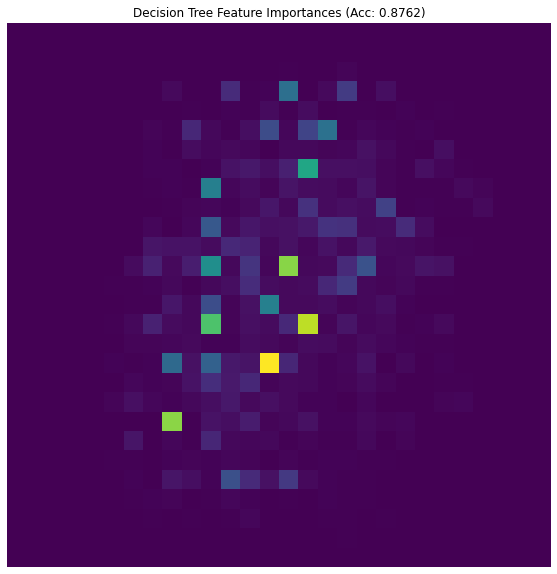

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

tree_features = DecisionTreeClassifier(random_state = 8675309)
tree_features.fit(x_train,y_train)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(tree_features.feature_importances_.reshape(28,28))
plt.title("Decision Tree Feature Importances (Acc: {})".format(tree_features.score(x_test,y_test)))
plt.show()

## Feature importance with Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Do a quick sweep for optimal number of features
log = []
for i in np.arange(1, 28*28, 10):
    model = RandomForestClassifier(max_features = i,
                                   n_estimators = 15,
                                   n_jobs = -1,
                                   verbose = 1,
                                   random_state = 8675309)
    model.fit(x_train,y_train)
    log.append(model.score(x_test,y_test))

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Paral

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,28*28,10),log)
plt.title("Accuracy Max At: {}".format(np.arange(1,28*28,10)[np.argmax(log)]))
plt.show()

In [ ]:
# Plot the importance there

best_features = RandomForestClassifier(max_features = 100,
                                       n_estimators = 255,
                                       n_jobs = -1,
                                       verbose = 1,
                                       random_state = 8675309)
best_features.fit(x_train,y_train)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(best_features.feature_importances_.reshape(28,28))
plt.title("Random Forest Feature Importances (Acc: {})".format(best_features.score(x_test,y_test)))

## Limitations for Featujre Importance
* Depends on trees
* Cannot be used when there are correlated Variables


## Permutation Importance

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


best_features = RandomForestClassifier(max_features = 100,
                                       n_estimators = 255,
                                       n_jobs = -1,
                                       verbose = 1,
                                       random_state = 8675309)
best_features.fit(x_train,y_train)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(best_features.feature_importances_.reshape(28,28))
plt.title("Random Forest Feature Importances (Acc: {})".format(best_features.score(x_test,y_test)))
plt.show()

In [ ]:
def permutation_importance(model, x_test, y_test):
    baseline = model.score(x_test,y_test)
    imp = []
    for idx in range(x_test.shape[1]) :
        temp_imp = []
        temp = x_test[:,idx].copy()
        for i in range(10) :
            np.random.shuffle(x_test[:,idx])
            temp_imp.append(baseline - model.score(x_test,y_test))
        imp.append(np.mean(temp_imp))
        x_test[:,idx] = temp
    return imp

perm_imps = permutation_importance(best_features,x_test,y_test)

In [ ]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(np.array([max(x,0) for x in perm_imps]).reshape(28,28))
plt.title("Random Forest Permutation Importances (Acc: {})".format(best_features.score(x_test,y_test)))
plt.show()